In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')


In [46]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [73]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [74]:
df.shape

(398, 9)

<AxesSubplot:xlabel='mpg', ylabel='Count'>

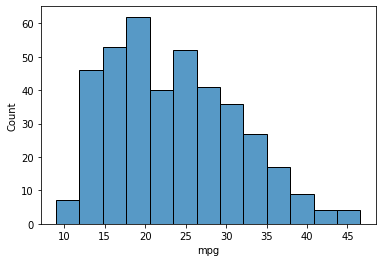

In [75]:
sns.histplot(df.mpg)

For interactive visualization we will used ploty package 

In [14]:
import plotly.express as px

<AxesSubplot:xlabel='mpg'>

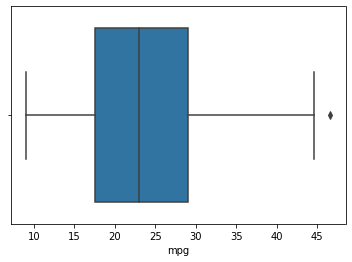

In [76]:
sns.boxplot(df['mpg'])

In [77]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [78]:
df.dropna(inplace=True)

In [79]:
iqr = np.percentile(df.mpg , 75) - np.percentile(df.mpg , 25)
Q = np.quantile(df.mpg , .75) + (1.5*(iqr))
Q

47.0

For outlier detection u can also compare mean with the medium value as if there is any outlier then u may see a big difference in both this value

In [80]:
df[(df.mpg)<Q]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [81]:
px.box(df , x = 'mpg')

In [82]:
px.histogram(df , x = 'origin' , color = 'origin')

In [83]:
px.pie(df , names  = 'origin' , color = 'name')

<AxesSubplot:xlabel='acceleration', ylabel='Count'>

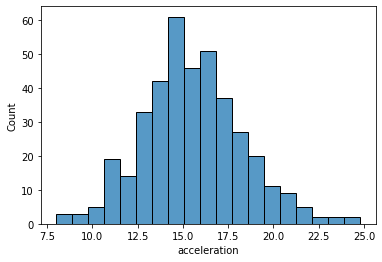

In [84]:
sns.histplot(df.acceleration)

for univariate analysis if data has categorical in nature then we can use bar graph and pie chart to describe the data
and if data is continous in nature then we can describe it by histogram or boxplot

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
encode = LabelEncoder()
scale = StandardScaler()
data = df
data['name'] = encode.fit_transform(data['name'])
data['origin'] = encode.fit_transform(data['origin'])

In [107]:
data['origin'].unique()
data['name'].unique()

array([ 48,  35, 229,  13, 159, 140,  53, 221, 239,   1, 100, 213,  56,
        29, 270, 218,   7, 149,  94, 278, 209,  15, 254,  21,   6, 132,
        67, 111, 161,  64, 267, 230, 160,   9, 240, 115, 128, 248,   8,
        63, 241, 150, 185, 206, 208, 122, 263,  75, 282, 216, 268, 104,
       289,  62, 156,   2, 190,  30, 201,  74, 181,  10,  47, 142, 231,
       291, 279, 210, 251, 155,  84, 275, 103, 264,  24,  54, 141, 108,
       191,  43, 147, 220,  73,  28,   0, 233,  61, 288, 127, 217, 205,
       259,  86, 172, 154, 186, 120,  58, 242, 123, 207,  16, 290, 112,
       256, 272, 202,  60,  91,  49, 232,  26, 109,  20, 280,  87, 102,
       121, 165, 257, 126, 234, 192,  41, 222,  23,  40, 219,  33,  59,
       152, 262, 238, 283,  11, 292, 169, 124,  39, 252, 107,  50,  65,
       298,  99, 144, 250,  12,  90, 293, 237, 184,  38,  66, 131, 110,
       163,  31, 253, 214,  93, 200, 116, 187,  52,  34, 236, 143, 243,
        57,  69, 158, 284, 249, 265, 153, 106, 258,  88,  22, 17

<AxesSubplot:ylabel='Density'>

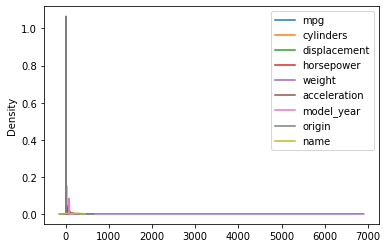

In [114]:
data.plot.kde()


In [118]:
data = scale.fit_transform(data)

array([[-0.69863841,  1.48394702,  1.07728956, ..., -1.62531533,
         0.71128521, -1.11331083],
       [-1.08349824,  1.48394702,  1.48873169, ..., -1.62531533,
         0.71128521, -1.26018059],
       [-0.69863841,  1.48394702,  1.1825422 , ..., -1.62531533,
         0.71128521,  0.93156815],
       ...,
       [ 1.09737414, -0.86401356, -0.56847897, ...,  1.63640964,
         0.71128521, -0.32247366],
       [ 0.5842277 , -0.86401356, -0.7120053 , ...,  1.63640964,
         0.71128521,  0.11813563],
       [ 0.96908753, -0.86401356, -0.72157372, ...,  1.63640964,
         0.71128521, -0.88735735]])

In [120]:
data = pd.DataFrame(data , columns=['mpg' , 'cylinders' , 'discpalcement' , 'horsepower' , 'weight' , 'acceleration' , 'model_year' , 'origin' , 'name'] )
data.describe()

,mpg,cylinders,discpalcement,horsepower,weight,acceleration,model_year,origin,name
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-3.438293e-16,2.384714e-16,-1.393443e-16,-3.293850e-16,5.607759e-17,1.608691e-16,-2.095829e-16,3.908438e-17,1.138545e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.853218e+00,-1.451004e+00,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00,-1.625315e+00,-1.882425e+00,-1.655599e+00
25%,-8.269250e-01,-8.640136e-01,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01,-8.098841e-01,-5.855697e-01,-9.353725e-01
50%,-8.927701e-02,-8.640136e-01,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02,5.547151e-03,7.112852e-01,1.080772e-02
75%,7.125143e-01,1.483947e+00,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01,8.209784e-01,7.112852e-01,8.666065e-01
max,2.970359e+00,1.483947e+00,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00,1.636410e+00,7.112852e-01,1.733703e+00


<AxesSubplot:ylabel='Density'>

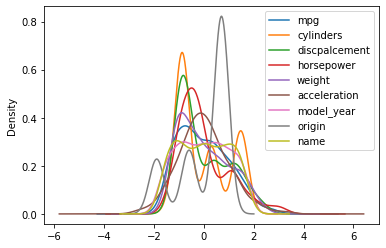

In [121]:
data.plot.kde()

In [4]:
from math import *
-0.75*log2(0.75)- 0.25*log2(0.25)
-0.5*log2(0.5)- 0.5*log2(0.5)

1.0

In [123]:
px.box(data)

In [124]:
px.histogram(data.horsepower)

In [126]:
data['horsepower'].skew()
#skewness value should be in the range of -1 to 1 for normal distribution

1.0873262824048704

In [127]:
data['acceleration'].skew() 

0.2915869257406034

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
india = pd.Series([np.random.randint(1,10)])
china = pd.Series([np.random.randint(1,10)])
india ,china

(0    8
 dtype: int64,
 0    4
 dtype: int64)

In [26]:
data = pd.DataFrame([india , china] )
data

,0
0,8
1,4


<AxesSubplot:>

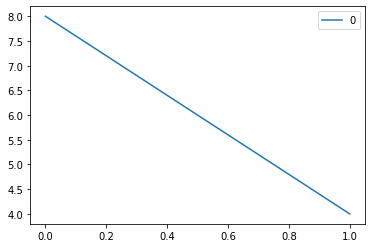

In [27]:
data.plot.line()

<AxesSubplot:ylabel='Frequency'>

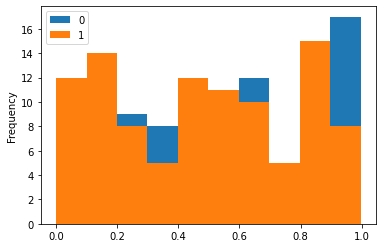

In [45]:
%matplotlib inline
x = np.random.random(100)
y = np.random.random(100)
data = pd.DataFrame([x,y])
data = data.T
data.plot(kind = 'hist')

In [68]:
data = pd.read_excel("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx",
skiprows = 20,)
data.head()

,Type,Coverage,AreaName,RegName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Citizens,Northern America,Northern America,..,..,..,..,..,..,...,..,..,..,..,..,..,..,1,1,NaN
1,Immigrants,Foreigners,Africa,Eastern Africa,1471,1641,1426,1094,1187,1134,...,7726,7083,6750,6669,6705,6922,8591,8956,8846,NaN
2,Immigrants,Foreigners,Africa,Middle Africa,33,27,44,32,42,30,...,2452,2802,2834,2951,3034,3255,3369,3146,4602,NaN
3,Immigrants,Foreigners,Africa,Northern Africa,1100,1268,1348,936,842,840,...,12478,11323,12705,11750,13456,16320,19271,15712,15453,NaN
4,Immigrants,Foreigners,Africa,Southern Africa,1041,1126,791,387,297,327,...,1203,1012,1148,1230,1184,1235,1306,1049,1348,NaN
